<a href="https://colab.research.google.com/github/WendyOira/HASS-CONSULTING-PREDICTION/blob/main/Housing_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#REAL ESTATE SALE PRICE PREDICTION

##**Defining the Question**

You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 


## **Specifying the Question**

Study the factors that affect housing prices.

Create a model that would allow the company to accurately predict the sale of prices





##**Defining the Metric for Success**


Making correct predictions on housing sale prices with the model with the lowest mean squared error

##**Understanding the Context**

Hass Consulting Company is a real estate leader with over 25 years of experience



##**Recording the experimental design**

Define the question, the metric for success, the context, experimental design taken.

Read and explore the given dataset.

Define the appropriateness of the available data to answer the given question.

Find and deal with outliers, anomalies, and missing data within the dataset.

Perform univariate, bivariate and multivariate analysis recording your observations.

Performing regression analysis.

Incorporate categorical independent variables into your models.

Check for multicollinearity

Provide a recommendation based on your analysis. 

Create residual plots for your models, and assess heteroskedasticity using Barlett's test.

Challenge your solution by providing insights on how you can make improvements in model improvement.

In [ ]:
# Import the relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the real estate dataset
sale = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

In [ ]:
# Determining the no. of records in our dataset
sale.shape

(21613, 20)

We have 21,613 records and 20 variables

In [ ]:
# Previewing the top of our dataset
sale.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Previewing the bottom of our dataset
sale.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Checking our dataframe's information
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

Most of our data are in float and integer datatypes

In [ ]:
# Checking the statistical information
sale.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# Checking the column names 
print('The column names in our dataset are :')
sale.columns

The column names in our dataset are :


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# Checking for null values
sale.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We have no null values in our dataframe

In [ ]:
# Check for duplicate values 
sale.duplicated().sum()

3

We have 3 duplicates

In [ ]:
# Confirm the duplicated rows
duplicate = sale[sale.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14983,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


In [ ]:
# Dealing with the duplicate values 
# We will delete the identified duplicates
sale_dup = sale.drop_duplicates(keep = 'first')
# Confirm the changes 
sale_dup.duplicated().sum()

0

In [ ]:
# Check the shape of our dataframe after deleting the duplicates
sale_dup.shape

(21610, 20)

We have successfully deleted the 3 duplicates we had found

##Data Cleaning

In [ ]:
# We will drop columns from the dataframe that we don't need in our analysis
# ID is just a unique identification and will not play a role in predicting sales
sale_df = sale.drop(['id','lat','long'], axis=1)
# Confirm changes made
sale_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [ ]:
# Confirm our new dataframe shape
sale_df.shape

(21613, 17)

We now have 19 variables

In [ ]:
# Check for unique values in our dataframes inorder to identify any annomalies
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15']
for i in columns:
  print('Unique values in', i , 'are :')
  print(sale_df[i].unique())
  print('                                                                           ')
  print('***************************************************************************')


Unique values in price are :
[221900. 538000. 180000. ... 541800. 610685. 402101.]
                                                                           
***************************************************************************
Unique values in bedrooms are :
[ 3  2  4  5  1  6  7  0  8  9 11 10 33]
                                                                           
***************************************************************************
Unique values in bathrooms are :
[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
                                                                           
***************************************************************************
Unique values in sqft_living are :
[1180 2570  770 ... 3087 3118 1425]
                                                                           
******************************************************

There are no notable annomalies

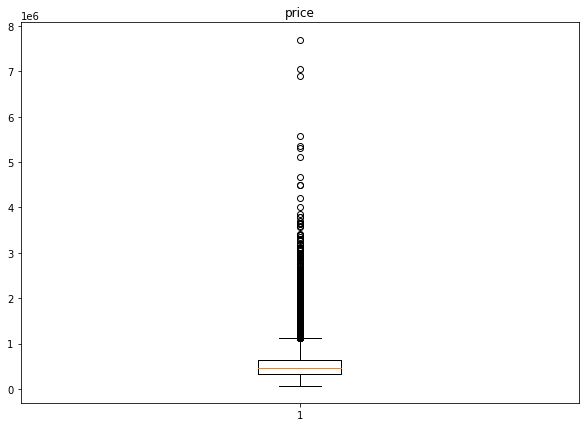

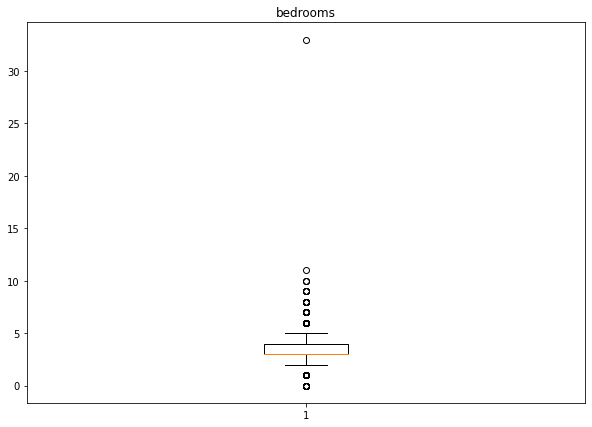

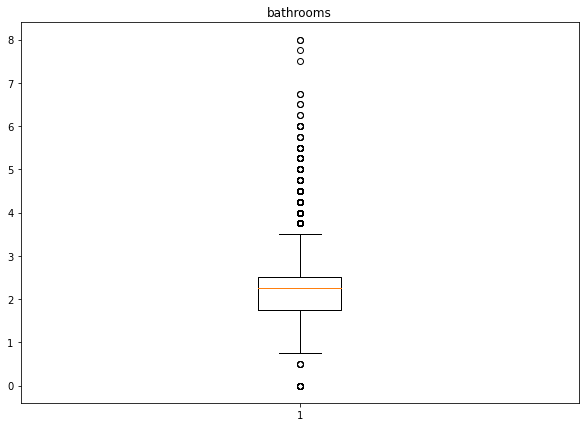

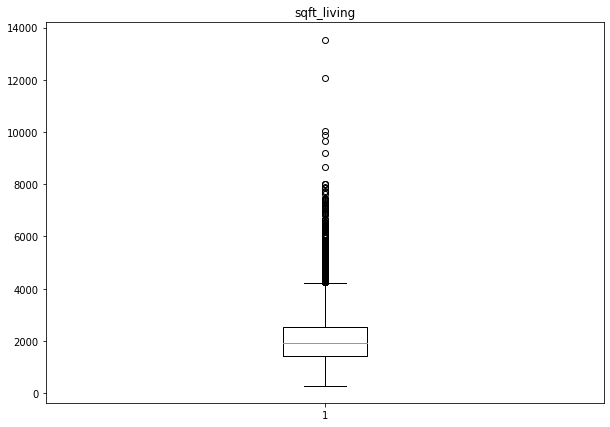

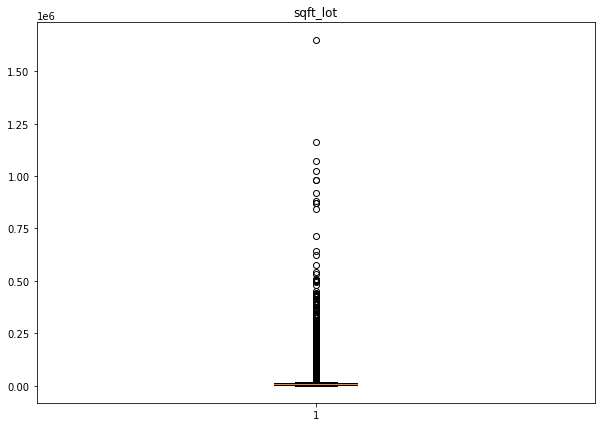

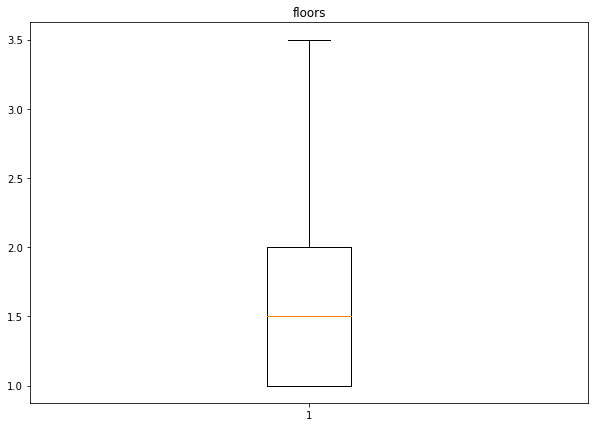

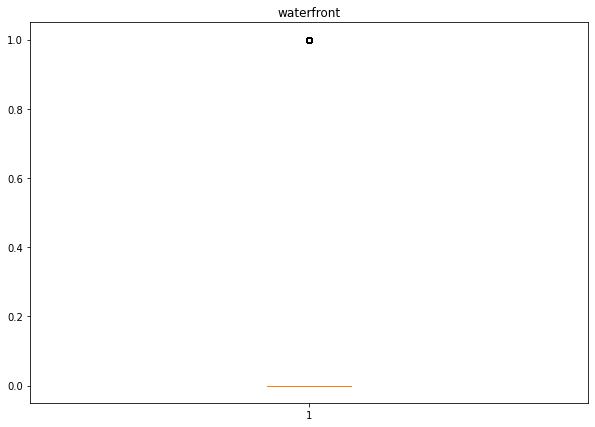

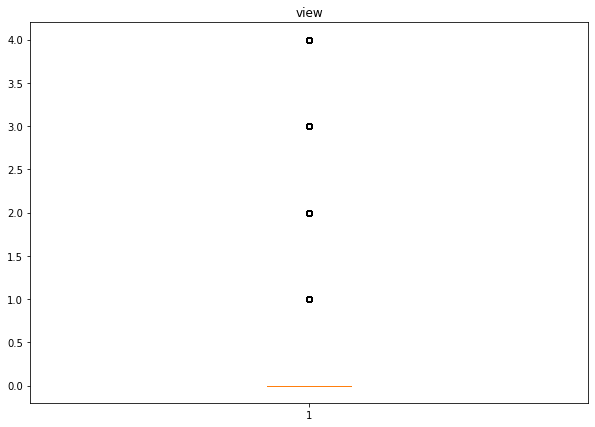

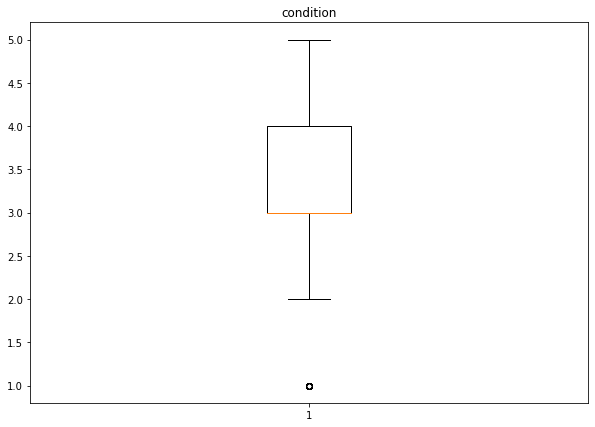

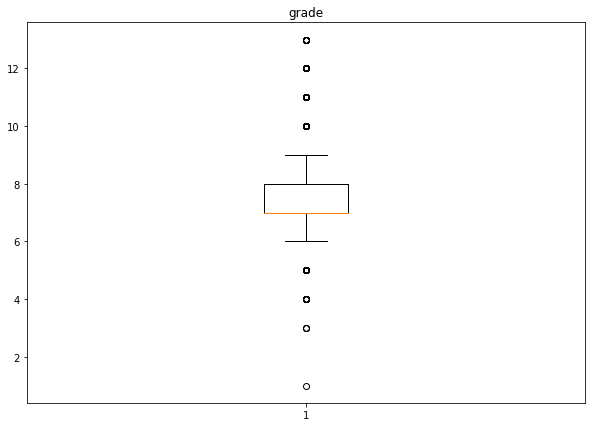

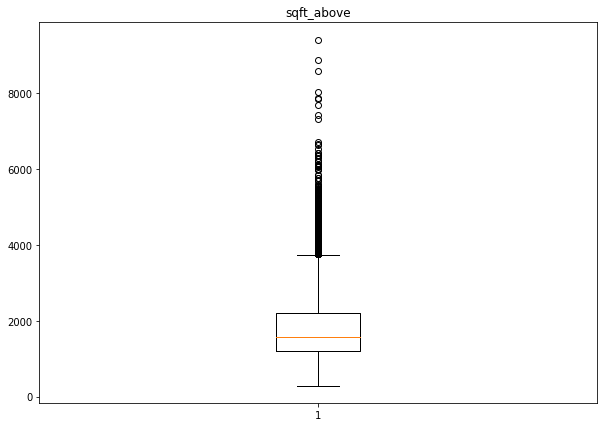

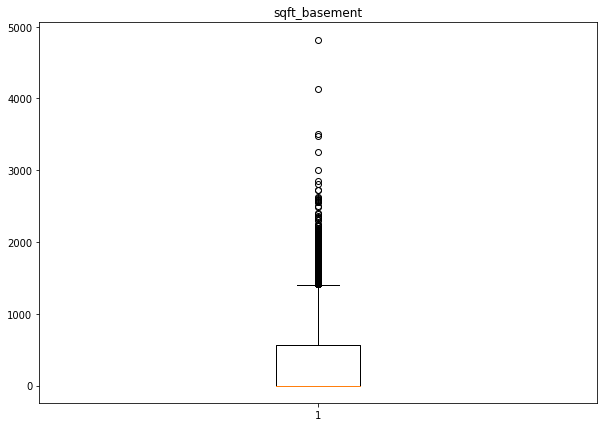

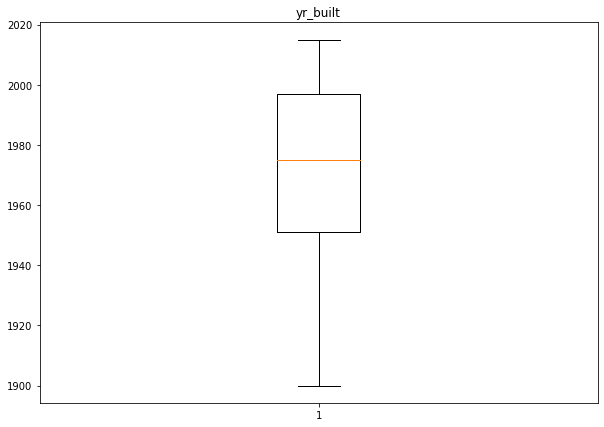

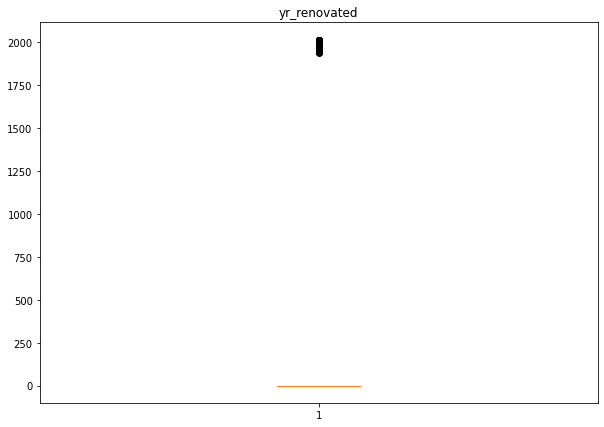

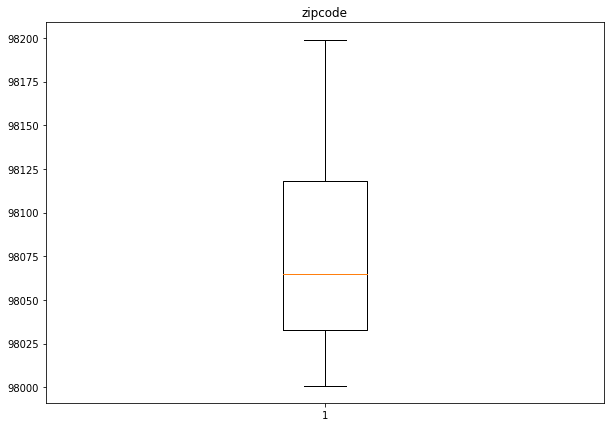

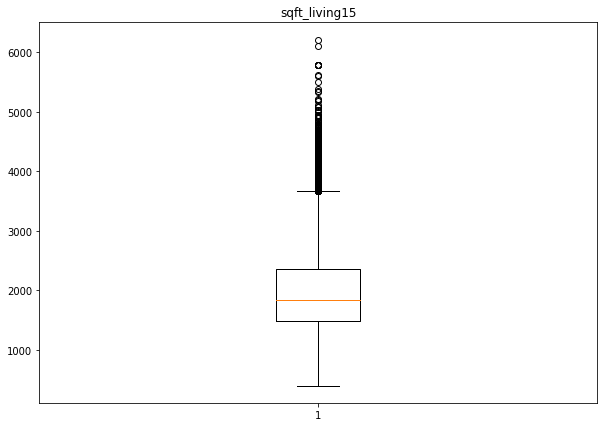

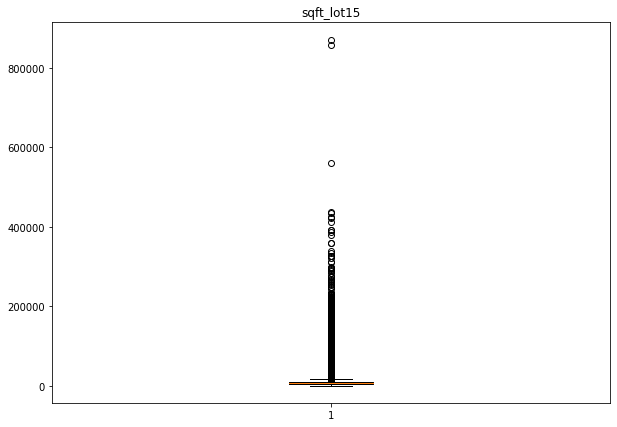

In [ ]:
# let's check for outliers in our dataframe
col = sale_df.columns
for i in col:
  fig = plt.figure(figsize = (10,7))
  plt.boxplot(sale_df[i])
  plt.title(i)
  plt.show()

##Exploratory Data Analysis

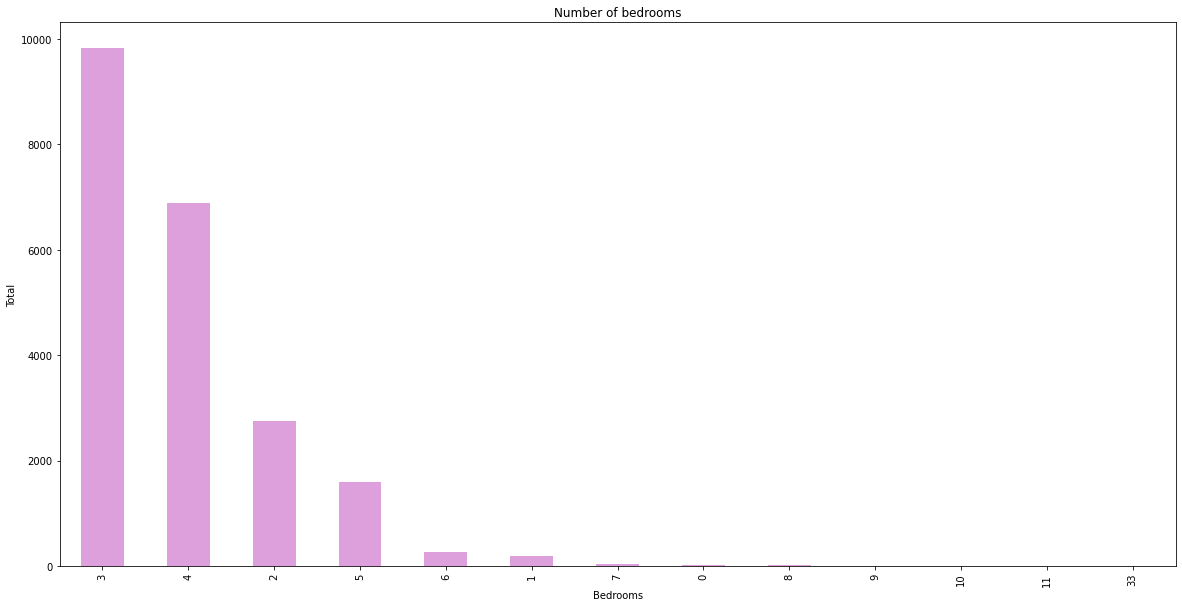

In [ ]:
# Bar chart on Bedrooms
plt.figure(figsize = (20,10))
sale_df.groupby('bedrooms').size().sort_values(ascending = False).plot(kind='bar', color='#DDA0DD')
plt.title('Number of bedrooms')
plt.ylabel('Total')
plt.xlabel('Bedrooms')
plt.show()

Most properties have 3 bedrooms

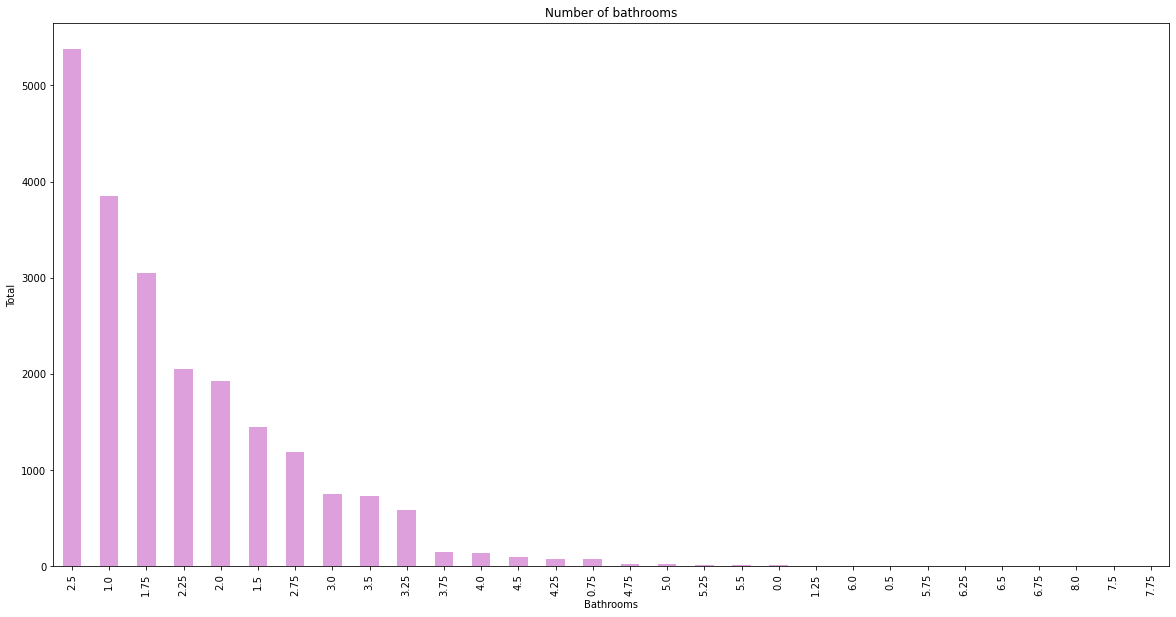

In [ ]:
# Bar chart on Bathrooms
plt.figure(figsize = (20,10))
sale_df.groupby('bathrooms').size().sort_values(ascending = False).plot(kind='bar', color='#DDA0DD')
plt.title('Number of bathrooms')
plt.ylabel('Total')
plt.xlabel('Bathrooms')
plt.show()

Most properties have 2.5 bathrooms

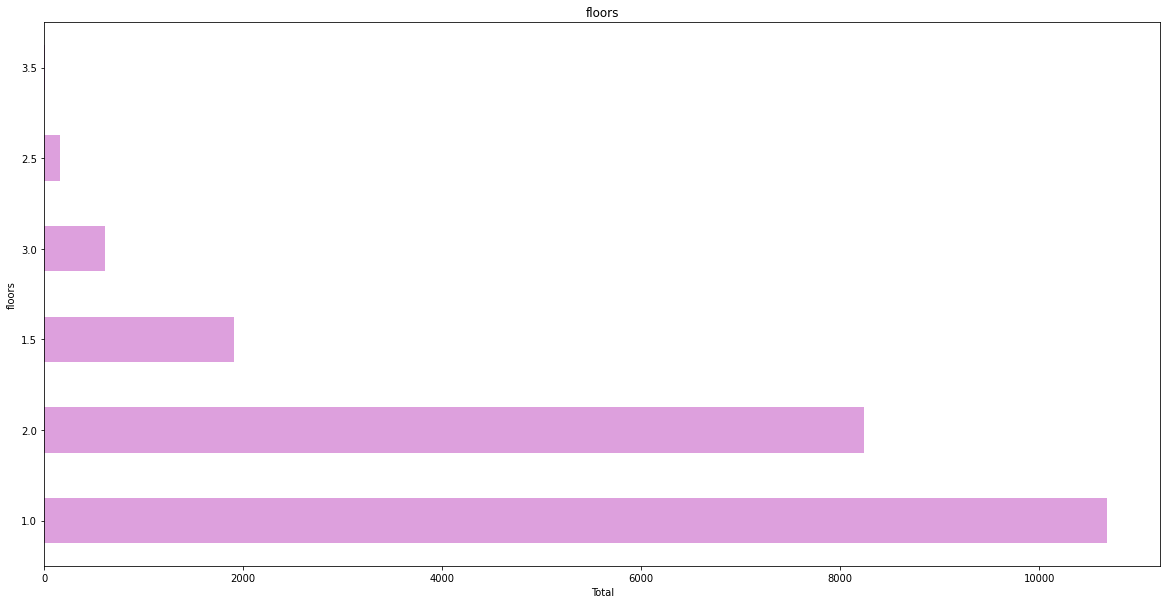

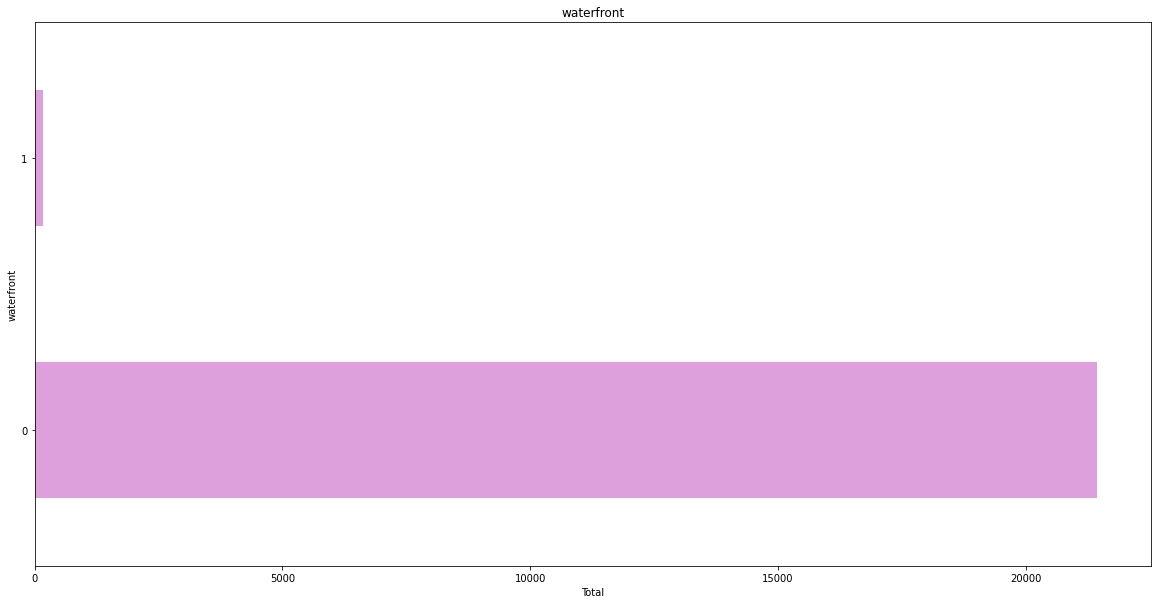

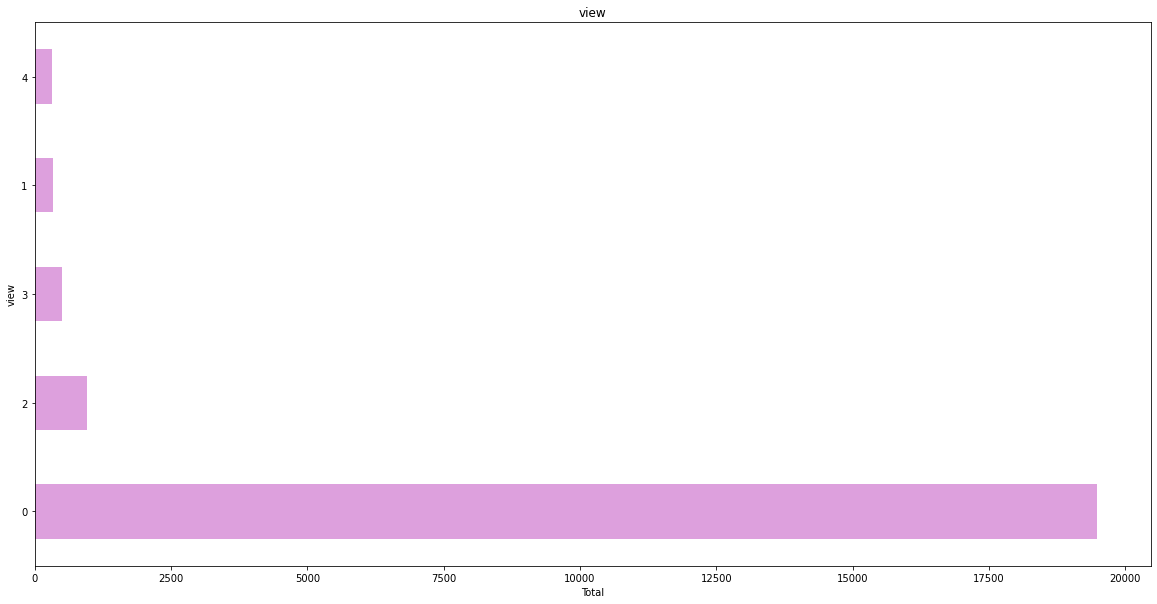

In [ ]:
# Bar chart on floors , waterfront, view
columns1 = ['floors','waterfront', 'view']
for i in columns1:
  plt.figure(figsize = (20,10))
  sale_df.groupby(i).size().sort_values(ascending = False).plot(kind='barh', color='#DDA0DD')
  plt.title(i)
  plt.ylabel(i)
  plt.xlabel('Total')
  plt.show()

Most properties do not have a view or border a sea, lake or river (Waterfront)

Most properties have 1 floor

In [ ]:
# Frequency tables
columns2 = ['sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement','zipcode','sqft_living15', 'sqft_lot15','yr_built', 'yr_renovated' ]
for i in columns2:
  print('Frequency table of', i)
  count = sale_df[i].value_counts().head()
  print(count)
  print('**********************************************************')
  print('                                                          ')


Frequency table of sqft_living
1300    138
1400    135
1440    133
1800    129
1660    129
Name: sqft_living, dtype: int64
**********************************************************
                                                          
Frequency table of sqft_lot
5000    358
6000    290
4000    251
7200    220
4800    120
Name: sqft_lot, dtype: int64
**********************************************************
                                                          
Frequency table of sqft_above
1300    212
1010    210
1200    206
1220    192
1140    184
Name: sqft_above, dtype: int64
**********************************************************
                                                          
Frequency table of sqft_basement
0      13126
600      221
700      218
500      214
800      206
Name: sqft_basement, dtype: int64
**********************************************************
                                                          
Frequency table of zipcode
98103   

Most properties have 5,000 sqft_lot15

Most properties have 1,540 sqft_living15

Most properties have 1,300 sqft_living

Most properties have 5,000 sqft_lot

Most properties have 1,300 sqft_above

Most properties have no basements

Most properties have not been renewed

Most properties were built in 2014


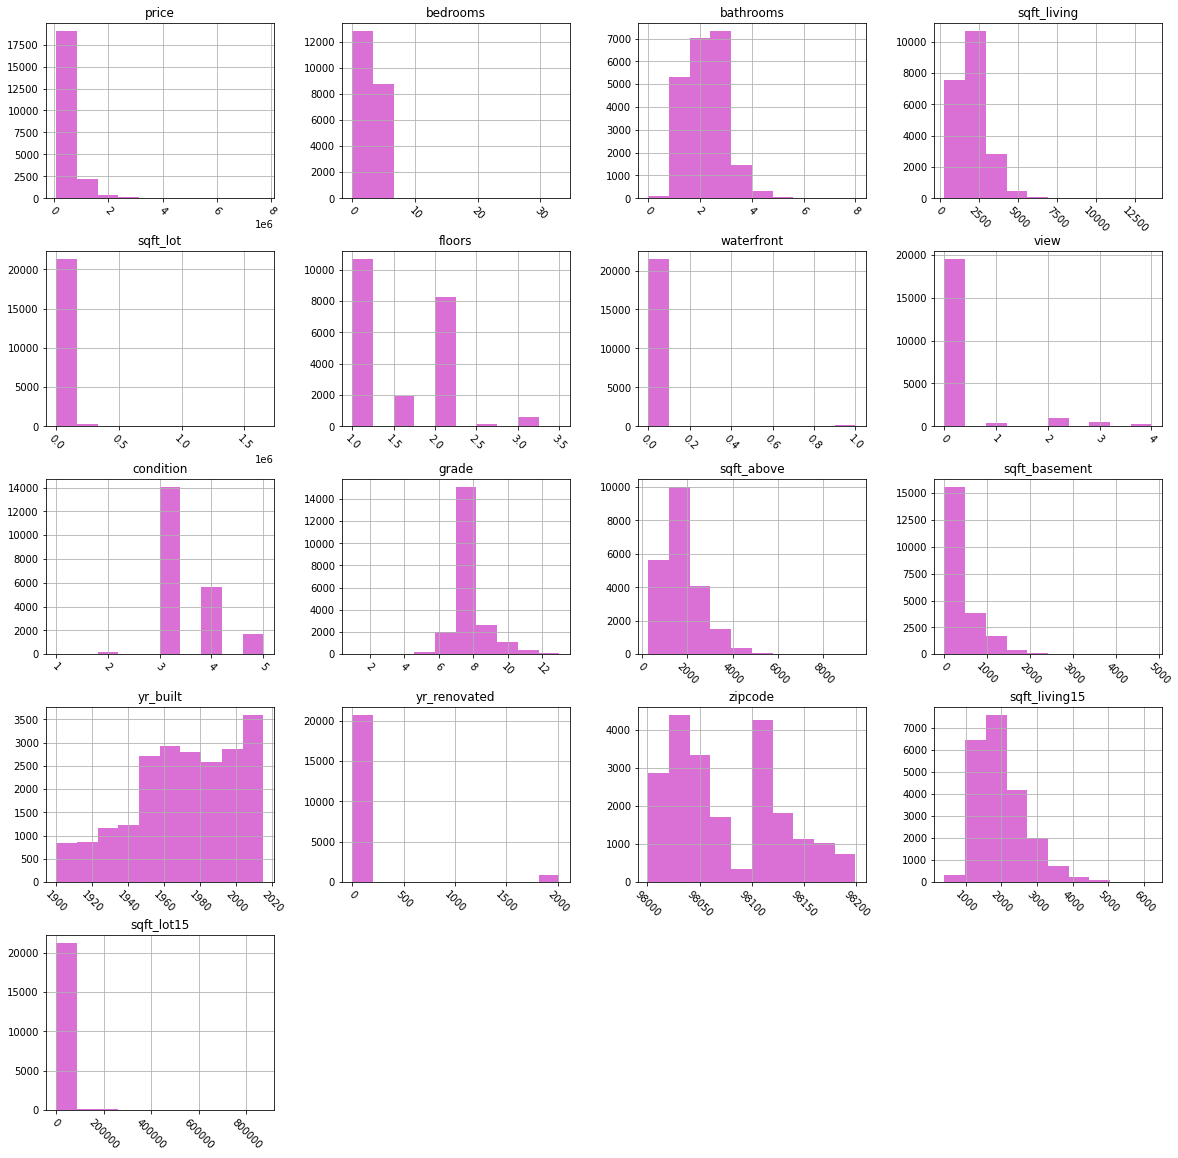

In [ ]:
# Histograms of our dataframe
sale_df.hist(figsize=(20,20), xrot= -45, color = '#DA70D6')
plt.show()

None of our variables are normally distributed

In [ ]:
# Checking the mean, standard deviation and quantiles of our dataframe
sale_df.describe() 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [ ]:
# Checking the median, mode, varaince, skewness and kurtosis of our dataframe
for i in col:
  print('The median of', i, 'is:')
  print(sale_df[i].median())
  print('The mode of', i, 'is:')
  print(sale_df[i].mode())
  print('The variance of', i, 'is:')
  print(sale_df[i].var())
  print('The skewness of', i, 'is:')
  print(sale_df[i].skew())
  print('The kurtosis of', i, 'is:')
  print(sale_df[i].kurt())
  print('                                    ')
  print('************************************')

The median of price is:
450000.0
The mode of price is:
0    350000.0
1    450000.0
dtype: float64
The variance of price is:
134955009292.83669
The skewness of price is:
4.021715573048684
The kurtosis of price is:
34.522444410072566
                                    
************************************
The median of bedrooms is:
3.0
The mode of bedrooms is:
0    3
dtype: int64
The variance of bedrooms is:
0.8650150097573724
The skewness of bedrooms is:
1.97429953543601
The kurtosis of bedrooms is:
49.06365318170099
                                    
************************************
The median of bathrooms is:
2.25
The mode of bathrooms is:
0    2.5
dtype: float64
The variance of bathrooms is:
0.5931512887355798
The skewness of bathrooms is:
0.5111075733474171
The kurtosis of bathrooms is:
1.2799024441754554
                                    
************************************
The median of sqft_living is:
1910.0
The mode of sqft_living is:
0    1300
dtype: int64
The varianc

##Bivariate Analysis

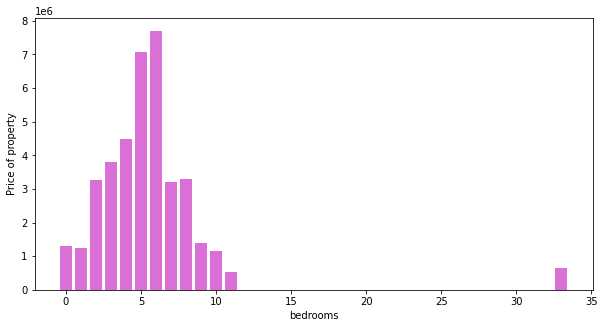

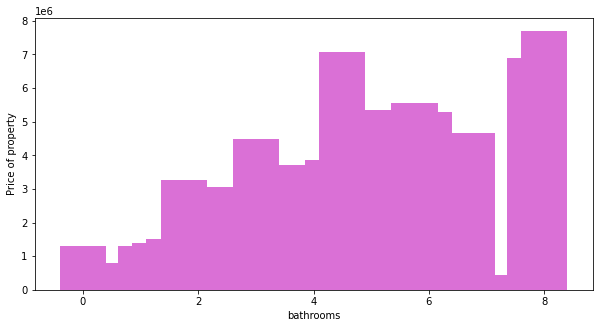

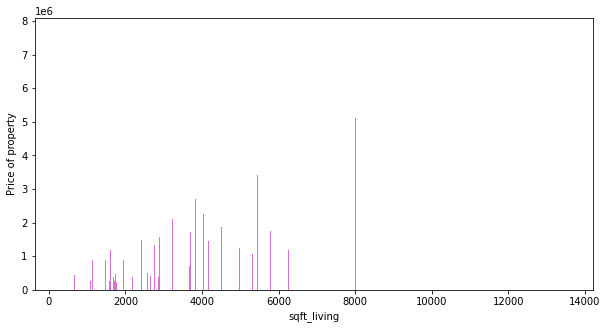

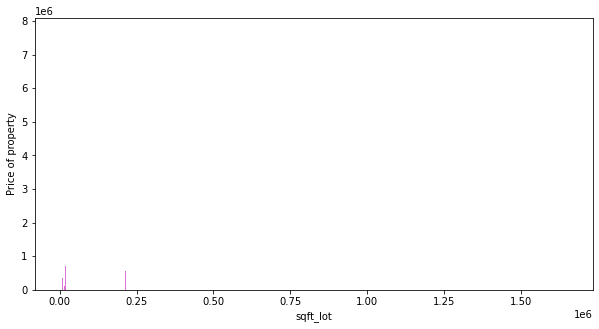

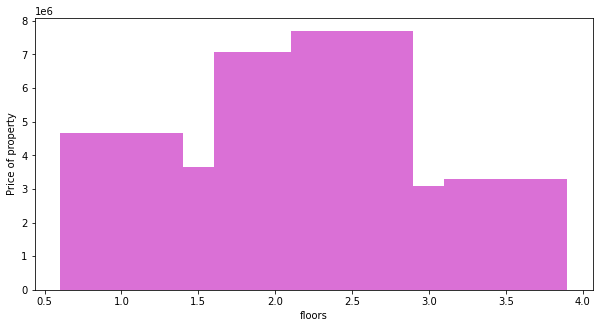

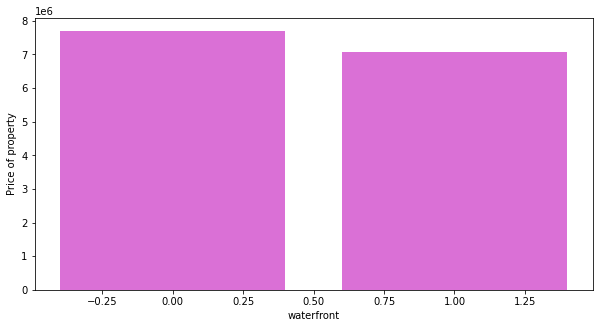

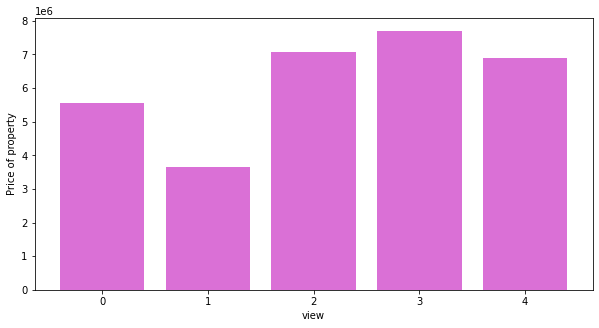

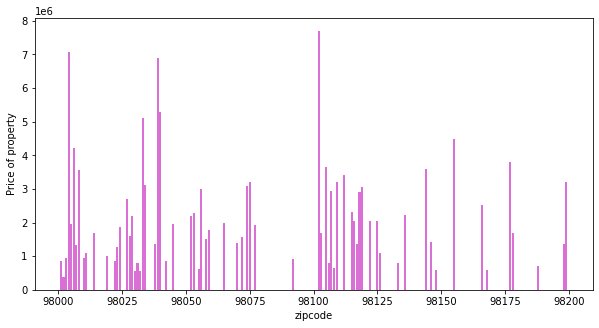

In [ ]:
# We will compare price to some of our variables
col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view','zipcode']

for i in col:
  fig = plt.figure(figsize = (10,5))
  x = sale_df[i]
  y = sale_df['price']
  plt.bar(x,y, color = '#DA70D6')
  plt.xlabel(i)
  plt.ylabel('Price of property')
  plt.show()


Most expensive properties have 6 bedrooms

Most expensive properties have 4.5 bathrooms

Most expensive properties have 8,000 sqrt_living

Most expensive properties have 2.5 floors

Most expensive properties are not waterfont

Most expensive properties have 3 views


In [ ]:
# Asses correlation between our variables 
sale_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.713202,0.119248


There is a strong positive correlation between sqft_living and price

There is a weak negative correlation between condition and bathroom

There is a strong positive correlation between grade and sqft_above

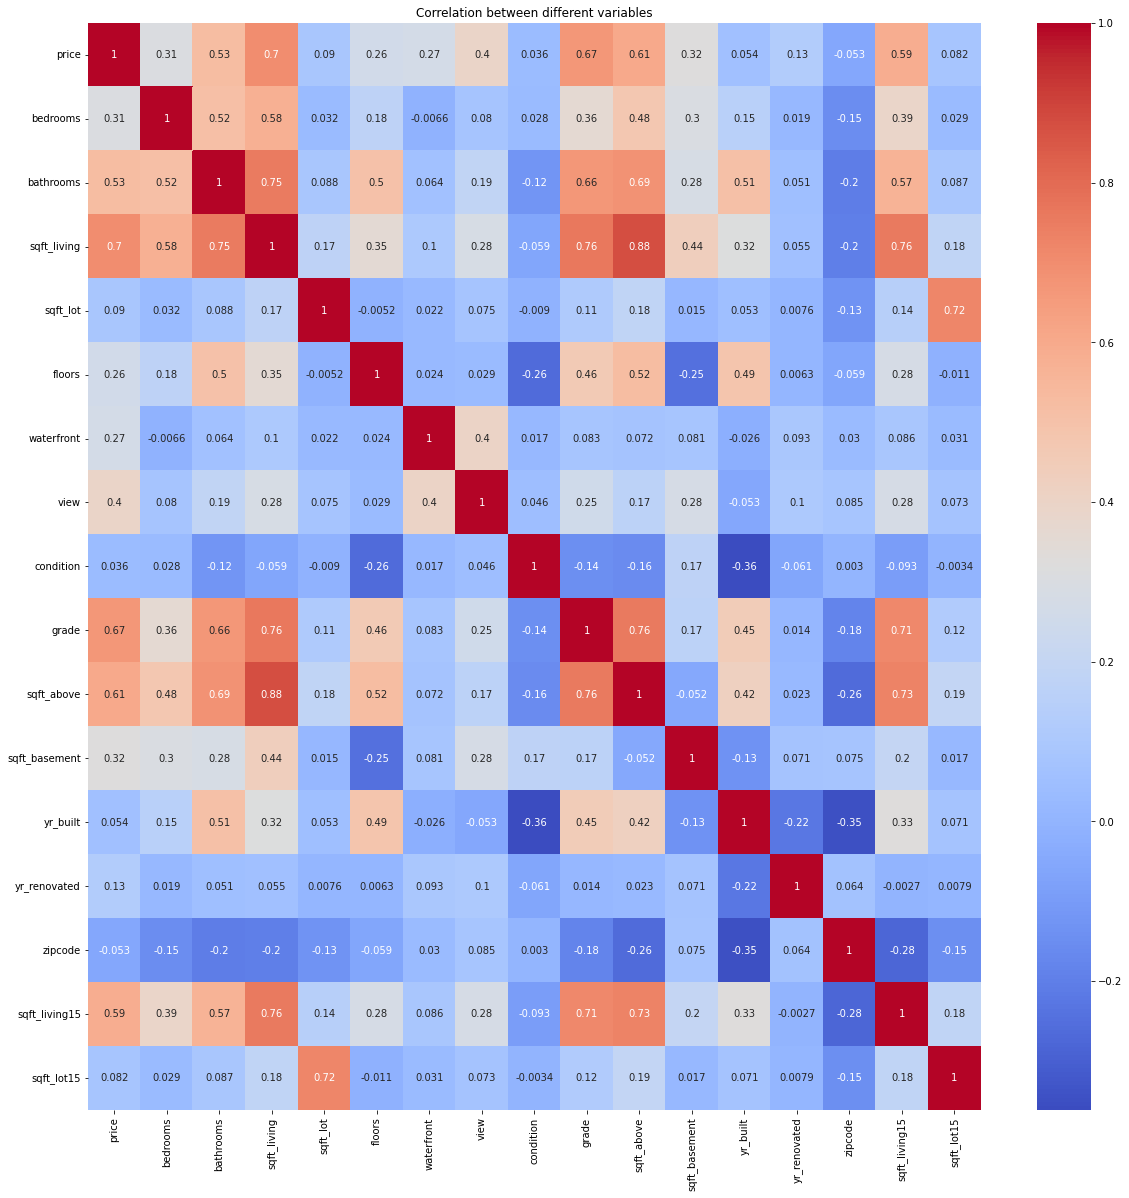

In [ ]:
# Plot a heatmap
# A visual representation of our correlation coefficients
fig, heat = plt.subplots(figsize = (20,20))
heat = sns.heatmap(sale_df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation between different variables')
plt.show()

##Multivariate Analysis

In [166]:
# We will start by separating our data into independent and dependent variables
X = sale_df.drop('price', axis =1)
y = sale_df['price']

In [167]:
# Let's view our independent variables
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


In [168]:
# Let's view our dependent variable
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [169]:
# Create an instance of LDA and train the model
import warnings
warnings.filterwarnings("ignore")
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(solver='eigen',shrinkage='auto')
X_lda = lda.fit(X,y)
lda_feat = X_lda.transform(X)

# Display the coefficients of the reducted colums
X_lda.coef_

array([[1.24161606e+02, 1.00884751e+02, 6.29096448e-02, ...,
        4.89643271e+01, 6.51003201e-01, 4.52407762e-03],
       [1.25894809e+02, 1.04779299e+02, 6.09399069e-02, ...,
        4.90336585e+01, 6.53716960e-01, 4.48393352e-03],
       [1.23982539e+02, 1.05251302e+02, 6.13542208e-02, ...,
        4.89478346e+01, 6.51329689e-01, 4.47972171e-03],
       ...,
       [1.23001647e+02, 1.16659744e+02, 7.88465276e-02, ...,
        4.90328655e+01, 6.48146258e-01, 4.47200344e-03],
       [1.21799149e+02, 1.03357392e+02, 8.39983270e-02, ...,
        4.89899620e+01, 6.48024461e-01, 4.43365748e-03],
       [1.20424093e+02, 1.15258153e+02, 8.69495644e-02, ...,
        4.90375281e+01, 6.44978894e-01, 4.40897219e-03]])

In [170]:
# Create a dataframe so that we can see the names of the columns
lda_df = pd.DataFrame(index=X.columns.values, data=X_lda.coef_[0].T)
lda_df.sort_values(0, ascending=False)

,0
condition,255.368677
bedrooms,124.161606
bathrooms,100.884751
zipcode,48.964327
yr_built,20.090641
grade,14.593821
sqft_living15,0.651003
sqft_above,0.230136
sqft_living,0.062910
yr_renovated,0.035933


The values above indicate that when price increases sqft_basement, waterfront, view, floors decrease and viceversa

##Modelling 

In [171]:
# Check for multicollinearlity
# we first calculate the correlation coefficients
corr = X.corr()

In [172]:
# We derive the VIF
vif= pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

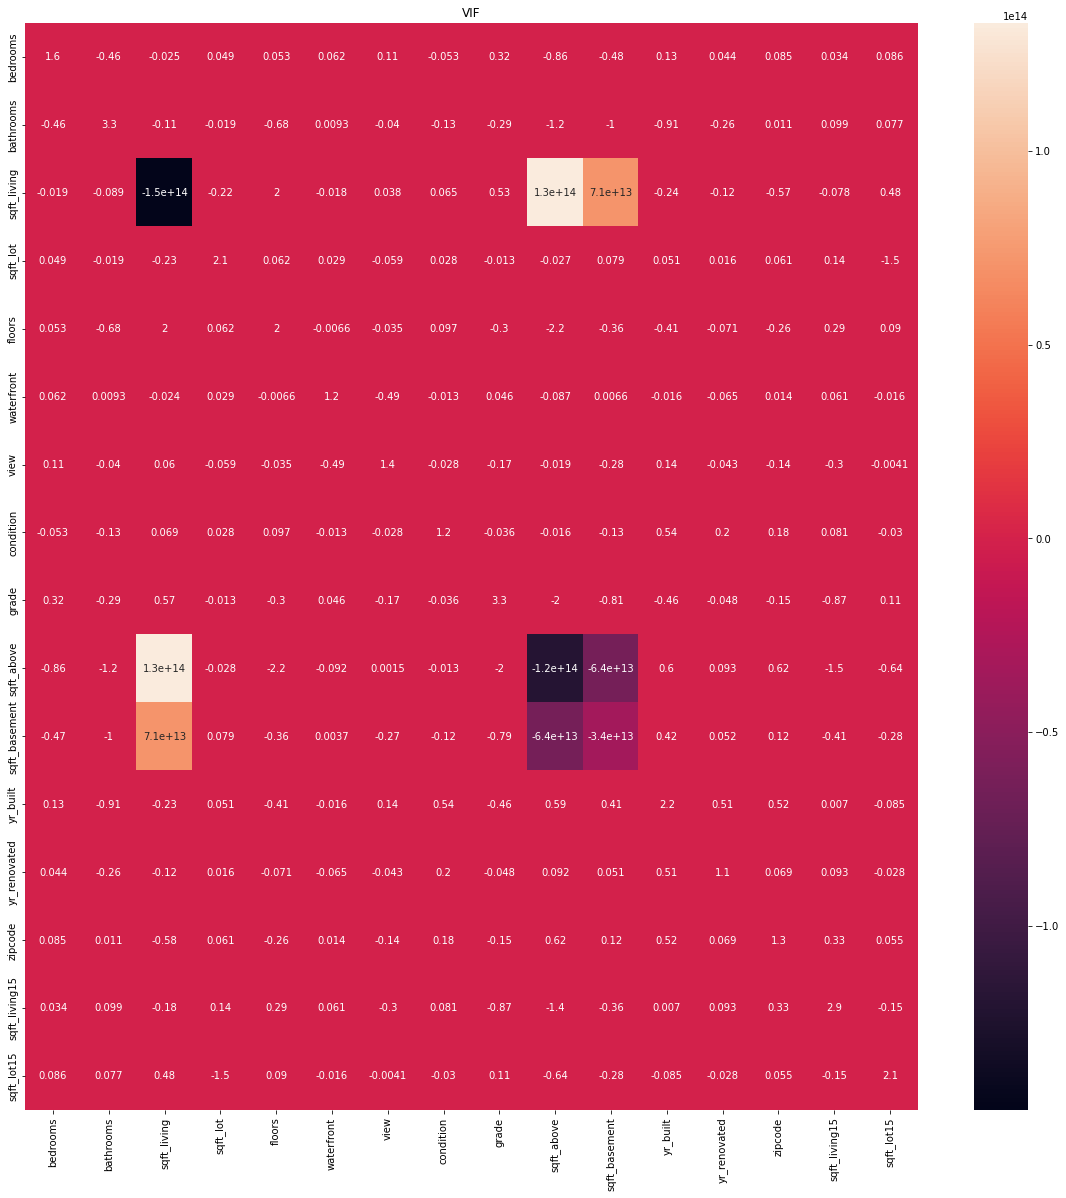

In [173]:
# Use a heatmap to display our results
plt.figure(figsize= (20,20))
sns.heatmap(vif, annot = True)
plt.title('VIF')
plt.show()

In [174]:
# We will use the Chi-squared statistical test to select 10 of the best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# apply SelectKBest class to extract top 10 best features
bestfeatures= SelectKBest(score_func=chi2, k=10)
fit= bestfeatures.fit(X,y)
dfscores= pd.DataFrame(fit.scores_)
dfcolumns= pd.DataFrame (X. columns)
#concat two dataframes for better visualization
featureScores= pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns=['Variable', 'Score']
print(featureScores.nlargest(10,'Score'))

         Variable         Score
3        sqft_lot  3.119557e+08
15     sqft_lot15  1.579147e+08
12   yr_renovated  7.053617e+06
2     sqft_living  5.345972e+06
9      sqft_above  4.218997e+06
10  sqft_basement  3.803564e+06
14  sqft_living15  2.626179e+06
6            view  1.564297e+04
5      waterfront  5.908140e+03
1       bathrooms  2.608815e+03


In [175]:
# We will narrow down X to the above variables 
X_df = X[['sqft_lot','sqft_lot15','yr_renovated','sqft_living','sqft_above','sqft_basement','sqft_living15','waterfront', 'view','bathrooms']]
# View changes
X_df.head()

,sqft_lot,sqft_lot15,yr_renovated,sqft_living,sqft_above,sqft_basement,sqft_living15,waterfront,view,bathrooms
0,5650,5650,0,1180,1180,0,1340,0,0,1.00
1,7242,7639,1991,2570,2170,400,1690,0,0,2.25
2,10000,8062,0,770,770,0,2720,0,0,1.00
3,5000,5000,0,1960,1050,910,1360,0,0,3.00
4,8080,7503,0,1680,1680,0,1800,0,0,2.00


##Multilinear Regression

In [176]:
# Import libraries
# The multiregression will be our base model
from sklearn.model_selection import train_test_split
# Split our data to train and test
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.2, random_state = 42)

In [177]:
# Apply our model
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
regressor = LinearRegression()
# fitting the training data
regressor.fit(X_train,y_train)

LinearRegression()

In [178]:
from sklearn import metrics
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 167080.38931905228
Mean Squared Error: 65171981278.79719
Root Mean Squared Error: 255288.035910023


In [179]:
# We will perform crossvalidation to see whether the model improves when subject to different train test combinations
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt

# define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# build multiple linear regression model
model = LinearRegression()

# use k-fold CV to evaluate model
scores = cross_val_score(model, X_df, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

# view mean absolute error
mean(absolute(scores))


163463.69434833186

Our MLR improves in Mean Squared error after cross validation

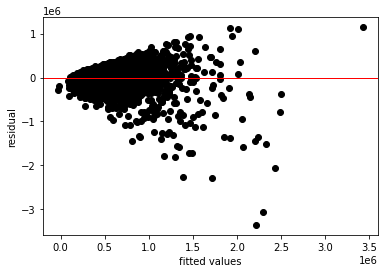

In [180]:
# Plot a residuals plot
# This is our prediction our model
y_predict = regressor.predict(X_test)
#
residuals = np.subtract(y_predict, y_test)
# Plot
plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [181]:
# Bartlett Tests
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


##Quantile Regression

In [182]:
# we will create a new dataframe with both X and y variables
df = pd.concat([X_df, sale_df['price']], axis=1)
df.head()

,sqft_lot,sqft_lot15,yr_renovated,sqft_living,sqft_above,sqft_basement,sqft_living15,waterfront,view,bathrooms,price
0,5650,5650,0,1180,1180,0,1340,0,0,1.00,221900.0
1,7242,7639,1991,2570,2170,400,1690,0,0,2.25,538000.0
2,10000,8062,0,770,770,0,2720,0,0,1.00,180000.0
3,5000,5000,0,1960,1050,910,1360,0,0,3.00,604000.0
4,8080,7503,0,1680,1680,0,1800,0,0,2.00,510000.0


In [183]:
# I will use the python package statsmodels for Quantile Regression
import statsmodels.formula.api as smf
mod = smf.quantreg('price~ sqft_lot + sqft_lot15 + yr_renovated + sqft_living + sqft_above + sqft_living15 + waterfront+ view + bathrooms', df)
res = mod.fit(q=.5)
# Then print out the summary of our model
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2890
Model:                       QuantReg   Bandwidth:                   3.001e+04
Method:                 Least Squares   Sparsity:                    4.569e+05
Date:                Sat, 12 Feb 2022   No. Observations:                21613
Time:                        09:45:41   Df Residuals:                    21603
                                        Df Model:                            9
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6384.3514   5449.905     -1.171      0.241   -1.71e+04    4297.865
sqft_lot          0.0503      0.054      0.930      0.353      -0.056       0.156
sqft_lot15       -0.5877      0.082     -7.124      0.000      -0.749      -0.426
yr_renovated     51.0248      3.911  

In [184]:
# Load a summary of the lower quantile (0.25)
mod = smf.quantreg('price~ sqft_lot + sqft_lot15 + yr_renovated + sqft_living + sqft_above + sqft_living15 + waterfront+ view + bathrooms', df)
res = mod.fit(q=.25)
# Then print out the summary of our model
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2253
Model:                       QuantReg   Bandwidth:                   2.687e+04
Method:                 Least Squares   Sparsity:                    4.155e+05
Date:                Sat, 12 Feb 2022   No. Observations:                21613
Time:                        09:45:49   Df Residuals:                    21603
                                        Df Model:                            9
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.142e+04   3962.941     -5.404      0.000   -2.92e+04   -1.36e+04
sqft_lot          0.0867      0.044      1.969      0.049       0.000       0.173
sqft_lot15       -0.1425      0.064     -2.228      0.026      -0.268      -0.017
yr_renovated     32.9466      3.085  

In [185]:
# Load a summary of the upper quantile (0.75)
mod = smf.quantreg('price~ sqft_lot + sqft_lot15 + yr_renovated + sqft_living + sqft_above + sqft_living15 + waterfront+ view + bathrooms', df)
res = mod.fit(q=.75)
# Then print out the summary of our model
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3571
Model:                       QuantReg   Bandwidth:                   2.689e+04
Method:                 Least Squares   Sparsity:                    5.894e+05
Date:                Sat, 12 Feb 2022   No. Observations:                21613
Time:                        09:45:57   Df Residuals:                    21603
                                        Df Model:                            9
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.292e+04   6406.006      9.822      0.000    5.04e+04    7.55e+04
sqft_lot          0.0816      0.069      1.177      0.239      -0.054       0.218
sqft_lot15       -0.7884      0.111     -7.083      0.000      -1.007      -0.570
yr_renovated     71.5186      4.446  

##Ridge Regression

In [186]:
# We will perform Ridge regression
# Start by importing the relevant libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#
import warnings
warnings.filterwarnings('ignore')
# Apply the model 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha': np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

search.fit(X_df,y)
print(search.best_params_)
abs(search.best_score_) 

{'alpha': 0.01}


59462123335.531166

In [187]:
# We will set our hyperparameters to the recommended values and run on the data
ridge = Ridge(normalize=True, alpha = 0.01)
ridge.fit(X_df,y)
model_1 =(mean_squared_error(y_true=y,y_pred=ridge.predict(X_df)))
print(model_1)

59006780416.04018


Comparing our mean squared errors for the two models. 

The ridge regression model performs better than our base model


##Lasso Regression

In [189]:
# Next we will perform Lasso Regression
# Start by importing the relevant libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")
# Set the alpha range
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5)))}
# Apply the model
lasso = Lasso(normalize=True) 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2', cv=10)

gridlasso.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)                                

lasso best parameters: {'alpha': 4.5}
lasso score: 0.5692898675971365
lasso MSE: 65190004268.2762
lasso best estimator coef: [-0.00000000e+00 -6.94497828e-01  6.33312091e+01  2.26537470e+02
  0.00000000e+00  0.00000000e+00  5.83278656e+01  5.36953586e+05
  7.16382056e+04  4.55438805e+02]


Lasso regression didn't perform better than the base model or Ridge regression

In [191]:
# We will set our hyperparameters to the recommended values and run on the data.
lasso = Lasso(normalize=True, alpha=4.5) 
lasso.fit(X_df,y) 
first_model=(mean_squared_error(y_true=y,y_pred= lasso.predict(X_df)))
print(first_model)

59008132486.12481


After tunning alpha value, Lasso regression performs better than the base model but not Ridge regression model

##Elastic Net regression

In [192]:
# Let's perform Elastic net regression 
# Import the libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
# Apply model
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
# Fit the model
search.fit(X_df,y)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


59473196604.37234

Elastic net regression performs better than our base model

In [193]:
# We will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio= 0.8)
elastic.fit(X_df,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X_df)))
print(second_model)

59056082372.01328


After tunning Elastic regression does not perform better than Ridge and Lasso

This proves that Lasso tends to do well if there is a small number significant parameters while Ridge works well if there are many large parameters.

##Challenging the Solution

Other models should be used in making predictions


More tunning could lower the models MSE 